# Loading the Packages

In [40]:
import numpy as np

In [41]:
import pandas as pd

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
import matplotlib.mlab as mlab

In [43]:
import seaborn as sns

In [44]:
import bokeh

In [45]:
from scipy.stats import norm

In [46]:
from subprocess import check_output

# Reading the Dataset

In [47]:
price = pd.read_csv('./price.csv')
sqft = pd.read_csv('./pricepersqft.csv')

In [48]:
print(price.shape)

(13131, 81)


In [49]:
print(sqft.shape)

(11919, 81)


In [50]:
print(price['City'].nunique())

9670


In [51]:
print(price.columns)

Index(['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank',
       'November 2010', 'December 2010', 'January 2011', 'February 2011',
       'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011',
       'August 2011', 'September 2011', 'October 2011', 'November 2011',
       'December 2011', 'January 2012', 'February 2012', 'March 2012',
       'April 2012', 'May 2012', 'June 2012', 'July 2012', 'August 2012',
       'September 2012', 'October 2012', 'November 2012', 'December 2012',
       'January 2013', 'February 2013', 'March 2013', 'April 2013', 'May 2013',
       'June 2013', 'July 2013', 'August 2013', 'September 2013',
       'October 2013', 'November 2013', 'December 2013', 'January 2014',
       'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014',
       'July 2014', 'August 2014', 'September 2014', 'October 2014',
       'November 2014', 'December 2014', 'January 2015', 'February 2015',
       'March 2015', 'April 2015', 'May 2015',

In [52]:
print(price.head(20))

    City Code           City              Metro         County State  \
0        6181       New York           New York         Queens    NY   
1       12447    Los Angeles        Los Angeles    Los Angeles    CA   
2       17426        Chicago            Chicago           Cook    IL   
3       39051        Houston            Houston         Harris    TX   
4       13271   Philadelphia       Philadelphia   Philadelphia    PA   
5       40326        Phoenix            Phoenix       Maricopa    AZ   
6       18959      Las Vegas          Las Vegas          Clark    NV   
7        6915    San Antonio        San Antonio          Bexar    TX   
8       54296      San Diego          San Diego      San Diego    CA   
9       38128         Dallas  Dallas-Fort Worth         Dallas    TX   
10      33839       San Jose           San Jose    Santa Clara    CA   
11      25290   Jacksonville       Jacksonville          Duval    FL   
12      20330  San Francisco      San Francisco  San Francisco  

In [53]:
print(sqft.head(20))

    City Code           City              Metro         County State  \
0        6181       New York           New York         Queens    NY   
1       12447    Los Angeles        Los Angeles    Los Angeles    CA   
2       17426        Chicago            Chicago           Cook    IL   
3       39051        Houston            Houston         Harris    TX   
4       13271   Philadelphia       Philadelphia   Philadelphia    PA   
5       40326        Phoenix            Phoenix       Maricopa    AZ   
6       18959      Las Vegas          Las Vegas          Clark    NV   
7        6915    San Antonio        San Antonio          Bexar    TX   
8       54296      San Diego          San Diego      San Diego    CA   
9       38128         Dallas  Dallas-Fort Worth         Dallas    TX   
10      33839       San Jose           San Jose    Santa Clara    CA   
11      25290   Jacksonville       Jacksonville          Duval    FL   
12      20330  San Francisco      San Francisco  San Francisco  

In [54]:
price.describe()

,City Code,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,13131.000000,13131.000000,11348.000000,11348.000000,11348.000000,11500.000000,11673.000000,11722.000000,11732.000000,11732.000000,...,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,78126.756454,6566.000000,1327.100458,1331.831953,1334.447744,1331.935217,1327.595819,1323.824518,1321.730822,1321.872826,...,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636,1467.296550
std,119604.910806,3790.737527,652.531343,655.822002,653.931315,647.853483,640.168818,636.392831,633.675563,631.981504,...,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626,820.707579
min,3300.000000,1.000000,547.000000,539.000000,536.000000,542.000000,535.000000,533.000000,533.000000,536.000000,...,543.000000,548.000000,547.000000,544.000000,539.000000,532.000000,527.000000,518.000000,517.000000,518.000000
25%,18803.000000,3283.500000,982.000000,984.750000,986.000000,984.000000,979.000000,973.000000,971.000000,972.000000,...,1041.000000,1044.000000,1046.000000,1043.500000,1038.000000,1034.000000,1032.000000,1033.000000,1034.000000,1035.000000
50%,34678.000000,6566.000000,1195.000000,1199.000000,1201.500000,1201.000000,1201.000000,1196.000000,1194.000000,1193.000000,...,1275.000000,1277.000000,1278.000000,1276.000000,1270.000000,1268.000000,1266.000000,1267.000000,1267.000000,1264.000000
75%,51385.500000,9848.500000,1479.000000,1479.000000,1479.000000,1477.000000,1473.000000,1471.000000,1472.000000,1473.000000,...,1625.000000,1630.000000,1633.000000,1629.000000,1628.000000,1628.000000,1630.500000,1630.000000,1632.000000,1634.000000
max,737791.000000,13131.000000,18787.000000,18848.000000,19054.000000,19019.000000,18997.000000,18939.000000,19119.000000,19442.000000,...,21344.000000,20547.000000,20400.000000,20639.000000,20695.000000,20615.000000,20163.000000,19460.000000,18605.000000,17985.000000


In [97]:
sqft.describe()

,City Code,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,Total Change,Percent Change,Year Change,Year Percent Change
count,11919.000000,10600.000000,10600.000000,10600.000000,10744.000000,10829.000000,10878.000000,10885.000000,10885.000000,10885.000000,...,11919.000000,11919.000000,11919.000000,11919.000000,11919.000000,11919.000000,10600.000000,10600.000000,11919.000000,11919.000000
mean,77097.011998,0.860989,0.863896,0.865602,0.864939,0.862232,0.860946,0.859769,0.859848,0.859505,...,0.963645,0.962379,0.962570,0.963743,0.964275,0.964356,0.097617,0.107012,0.017929,0.017944
std,118093.323482,0.286088,0.286489,0.284910,0.281532,0.278903,0.277075,0.275870,0.275311,0.274526,...,0.380334,0.381100,0.381545,0.381775,0.381395,0.381297,0.143625,0.131925,0.045231,0.044913
min,3300.000000,0.360000,0.358000,0.358000,0.358000,0.362000,0.366000,0.366000,0.366000,0.368000,...,0.382000,0.378000,0.378000,0.378000,0.378000,0.378000,-0.842000,-0.440605,-0.542000,-0.247191
25%,18762.000000,0.676000,0.678000,0.680000,0.682000,0.680000,0.678000,0.678000,0.678000,0.678000,...,0.730000,0.728000,0.728000,0.728000,0.730000,0.732000,0.020000,0.026565,-0.008000,-0.008496
50%,34637.000000,0.796000,0.799000,0.802000,0.802000,0.800000,0.800000,0.798000,0.800000,0.800000,...,0.870000,0.870000,0.870000,0.870000,0.872000,0.872000,0.074000,0.094149,0.014000,0.015873
75%,51298.500000,0.972000,0.974000,0.976000,0.972000,0.970000,0.968000,0.968000,0.968000,0.968000,...,1.080000,1.080000,1.082000,1.082000,1.080000,1.080000,0.144000,0.171582,0.040000,0.043147
max,737791.000000,4.482000,4.508000,4.558000,4.564000,4.548000,4.536000,4.528000,4.536000,4.542000,...,6.476000,6.486000,6.476000,6.470000,6.440000,6.406000,1.924000,0.905512,0.628000,0.282572


# Looking at Specific Geographic Cities

### Los Angeles

In [99]:
losAngeles = (price.loc[price['Metro'] == 'Los Angeles'])
losAngelesppsqft = (sqft.loc[sqft['City Code'].isin(losAngeles['City Code'])])

In [102]:
x = losAngeles.iloc[0:0,7:]               # date columns
print(x)

Empty DataFrame
Columns: [January 2011, February 2011, March 2011, April 2011, May 2011, June 2011, July 2011, August 2011, September 2011, October 2011, November 2011, December 2011, January 2012, February 2012, March 2012, April 2012, May 2012, June 2012, July 2012, August 2012, September 2012, October 2012, November 2012, December 2012, January 2013, February 2013, March 2013, April 2013, May 2013, June 2013, July 2013, August 2013, September 2013, October 2013, November 2013, December 2013, January 2014, February 2014, March 2014, April 2014, May 2014, June 2014, July 2014, August 2014, September 2014, October 2014, November 2014, December 2014, January 2015, February 2015, March 2015, April 2015, May 2015, June 2015, July 2015, August 2015, September 2015, October 2015, November 2015, December 2015, January 2016, February 2016, March 2016, April 2016, May 2016, June 2016, July 2016, August 2016, September 2016, October 2016, November 2016, December 2016, January 2017, Total Change

In [103]:
y = losAngeles.ix[:,7:]                 # year values
print(y)

                 January 2011  February 2011  March 2011  April 2011  \
Population Rank                                                        
2                      2183.0         2188.0      2189.0      2189.0   
37                     1968.0         1964.0      1960.0      1950.0   
54                     2179.0         2170.0      2161.0      2159.0   
55                     1996.0         1996.0      1995.0      1994.0   
112                    2553.0         2568.0      2575.0      2574.0   
129                    2378.0         2363.0      2341.0      2334.0   
134                    2500.0         2501.0      2498.0      2493.0   
145                    1598.0         1557.0      1526.0      1509.0   
160                    2155.0         2146.0      2139.0      2141.0   
168                    1630.0         1603.0      1578.0      1560.0   
180                    2206.0         2209.0      2209.0      2206.0   
181                    1715.0         1701.0      1676.0      16

### San Francisco

In [104]:
SF = (price.loc[price['Metro'] == 'San Francisco'])
SFppsqft = (sqft.loc[sqft['City Code'].isin(SF['City Code'])])

In [105]:
x = SF.iloc[0:0,7:]               # date columns
print(x)

Empty DataFrame
Columns: [January 2011, February 2011, March 2011, April 2011, May 2011, June 2011, July 2011, August 2011, September 2011, October 2011, November 2011, December 2011, January 2012, February 2012, March 2012, April 2012, May 2012, June 2012, July 2012, August 2012, September 2012, October 2012, November 2012, December 2012, January 2013, February 2013, March 2013, April 2013, May 2013, June 2013, July 2013, August 2013, September 2013, October 2013, November 2013, December 2013, January 2014, February 2014, March 2014, April 2014, May 2014, June 2014, July 2014, August 2014, September 2014, October 2014, November 2014, December 2014, January 2015, February 2015, March 2015, April 2015, May 2015, June 2015, July 2015, August 2015, September 2015, October 2015, November 2015, December 2015, January 2016, February 2016, March 2016, April 2016, May 2016, June 2016, July 2016, August 2016, September 2016, October 2016, November 2016, December 2016, January 2017, Total Change

In [106]:
y = SF.iloc[:,7:]                 # year values
print(y)

                 January 2011  February 2011  March 2011  April 2011  \
Population Rank                                                        
13                     3189.0         3127.0      3040.0      2970.0   
43                     1816.0         1767.0      1729.0      1712.0   
103                    2204.0         2188.0      2172.0      2163.0   
150                    1884.0         1848.0      1809.0      1783.0   
241                    1830.0         1825.0      1817.0      1819.0   
258                    2255.0         2289.0      2324.0      2344.0   
333                    2483.0         2535.0      2573.0      2607.0   
335                    2307.0         2327.0      2333.0      2332.0   
338                    1864.0         1847.0      1826.0      1809.0   
365                    1777.0         1751.0      1716.0      1702.0   
399                    2125.0         2132.0      2132.0      2129.0   
441                    1599.0         1591.0      1571.0      15

# Looking for NA Values and Cleaning Them Up

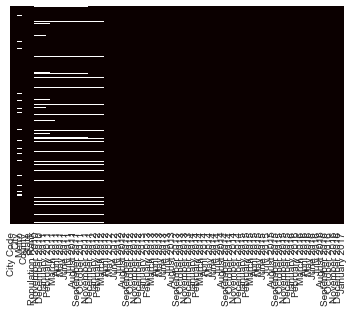

In [56]:
sns.heatmap(price.isnull(),yticklabels=False,cbar=False,cmap='hot')

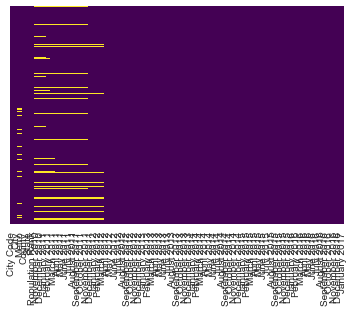

In [57]:
sns.heatmap(sqft.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Time for some cleaning.

In [58]:
price = price.set_index('Population Rank')
sqft = sqft.set_index('Population Rank')

In [59]:
price['Total Change'] = price.loc[:,'January 2017'] - price.loc[:,'November 2010']
price['Percent Change'] = (price.loc[:,'January 2017'] - price.loc[:,'November 2010']) / price.loc[:,'November 2010']
price['Year Change'] = price.loc[:,'January 2017'] - price.loc[:,'January 2016']
price['Year Percent Change'] = (price.loc[:,'January 2017'] - price.loc[:,'January 2016']) / price.loc[:,'January 2016']


# Price Change

In [60]:
print('Mean rent (Nov, 2010): ' + str(price['November 2010'].mean()))
print('Mean rent (Jan, 2017): ' + str(price['January 2017'].mean()))
print('------------------------------------------------------')
print('Mean total change: ' + str(price['Total Change'].mean()))
print('Mean percent change: ' + str(price['Percent Change'].mean()))
print('------------------------------------------------------')
print('Mean 1 year change: ' + str(price['Year Change'].mean()))
print('Mean 1 year percent change: ' + str(price['Year Percent Change'].mean()))


Mean rent (Nov, 2010): 1327.1004582305252
Mean rent (Jan, 2017): 1467.2965501485035
------------------------------------------------------
Mean total change: 137.95118082481494
Mean percent change: 0.09376333101269745
------------------------------------------------------
Mean 1 year change: 17.547939989338207
Mean 1 year percent change: 0.012141025197546347


# Square Feet Change

In [61]:
sqft['Total Change'] = sqft.loc[:,'January 2017'] - sqft.loc[:,'November 2010']
sqft['Percent Change'] = (sqft.loc[:,'January 2017'] - sqft.loc[:,'November 2010']) / sqft.loc[:,'November 2010']
sqft['Year Change'] = sqft.loc[:,'January 2017'] - sqft.loc[:,'January 2016']
sqft['Year Percent Change'] = (sqft.loc[:,'January 2017'] - sqft.loc[:,'January 2016']) / sqft.loc[:,'January 2016']


In [62]:
sqft.head()

,City Code,City,Metro,County,State,November 2010,December 2010,January 2011,February 2011,March 2011,...,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,Total Change,Percent Change,Year Change,Year Percent Change
Population Rank,,,,,,,,,,,,,,,,,,,,,
1,6181,New York,New York,Queens,NY,NaN,NaN,NaN,NaN,NaN,...,1.828,1.836,1.844,1.858,1.866,1.872,NaN,NaN,0.078,0.043478
2,12447,Los Angeles,Los Angeles,Los Angeles,CA,1.578,1.578,1.580,1.582,1.586,...,2.032,2.038,2.042,2.048,2.056,2.064,0.486,0.307985,0.116,0.059548
3,17426,Chicago,Chicago,Cook,IL,1.244,1.248,1.254,1.254,1.248,...,1.378,1.380,1.380,1.380,1.376,1.374,0.130,0.104502,0.036,0.026906
4,39051,Houston,Houston,Harris,TX,0.788,0.784,0.784,0.786,0.792,...,0.976,0.974,0.974,0.976,0.976,0.974,0.186,0.236041,-0.002,-0.002049
5,13271,Philadelphia,Philadelphia,Philadelphia,PA,0.854,0.858,0.858,0.858,0.856,...,0.964,0.966,0.968,0.972,0.974,0.974,0.120,0.140515,0.040,0.042827


# Exploratory Data Analysis

### By Price

In [83]:
def plotr(data, group, column, bins=100):
    plot = price.groupby(group)[column].mean().plot(kind='hist', bins=bins)
    (mu, sigma) = norm.fit(price[column])
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)
    
    plt.title('Mean {} Grouped by {}'.format(column, group))
    plt.xlabel(column)
    plt.ylabel('Numer of Occurrences')
    
    mn = price[column].mean()
    plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    return plot

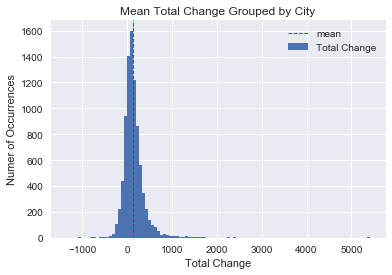

In [84]:
plotr(price, 'City', 'Total Change', bins=100) # City Level

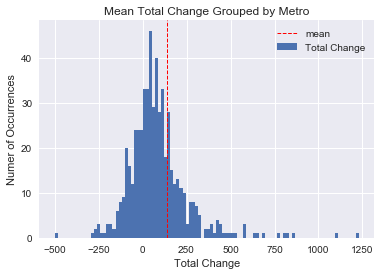

In [85]:
plotr(price, 'Metro', 'Total Change') # Metro Level

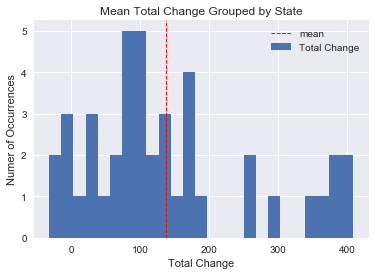

In [86]:
plotr(price, 'State', 'Total Change', bins=25) # State Level

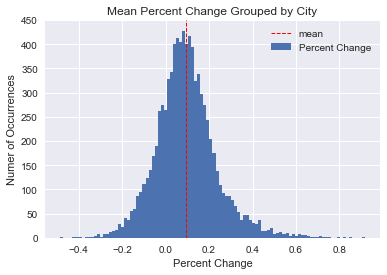

In [87]:
plotr(price, 'City', 'Percent Change') # Correlation between City and Percentage Change

C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


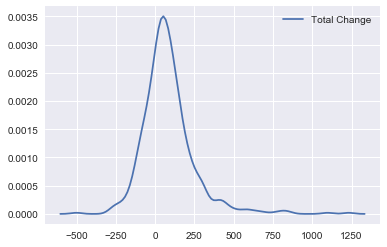

In [88]:
kb = price.groupby('Metro')['Total Change'].mean()
plot = sns.kdeplot(kb)
plt.show()
plt.clf()

C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


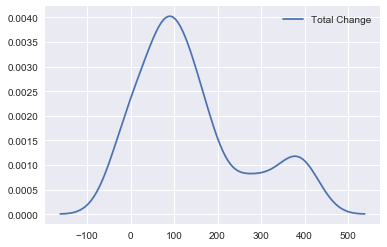

In [90]:
jan = price.groupby('State', as_index=True)['Total Change'].mean()
plot = sns.kdeplot(jan)
plt.show()
plt.clf()

## Locate the Highest Total Change Value (Investigate Skew)

In [93]:
print('Minimum total change: ' + str(price['Total Change'].min()))
print(price.loc[price['Total Change'].idxmin(),:].head(5))
print('-------------------------------')
print('Maximum total change: ' + str(price['Total Change'].max()))
print(price.loc[price['Total Change'].idxmax(),:].head(5))

Minimum total change: -1367.0
City Code              398547
City         Town of Westerly
Metro              Providence
County             Washington
State                      RI
Name: 2285, dtype: object
-------------------------------
Maximum total change: 5422.0
City Code            30280
City              Atherton
Metro        San Francisco
County           San Mateo
State                   CA
Name: 5152, dtype: object


In [94]:
print(price.loc[price['January 2017'].idxmax(),:].head(10))
print(price['January 2017'].max())

City Code                124901
City             Jupiter Island
Metro            Port St. Lucie
County                   Martin
State                        FL
November 2010             18787
December 2010             18848
January 2011              19054
February 2011             19019
March 2011                18997
Name: 12235, dtype: object
17985


In [96]:
print(price.groupby('State')['Total Change'].mean().sort_values(ascending=False).head(10))
print('---------------------------------')
print(price.groupby('State')['Total Change'].mean().sort_values(ascending=True).head(10))

State
OR    408.746988
DC    395.000000
CO    390.910828
CA    388.886179
MA    358.000000
HI    339.296296
WA    292.334483
WI    266.137681
FL    257.677903
NH    181.415094
Name: Total Change, dtype: float64
---------------------------------
State
MI   -32.180693
WV   -21.578313
LA    -7.397590
IL    -6.361111
NM    -1.206897
DE     5.368421
NY    24.535238
IA    31.274194
IN    32.467290
PA    51.103659
Name: Total Change, dtype: float64
